In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df=pd.read_excel('D:\\data set\\ENB2012_data.xlsx')

In [11]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


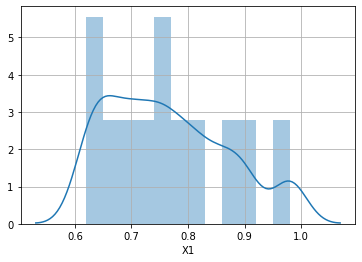

In [25]:
plt.grid()
sns.distplot(df['X1'])

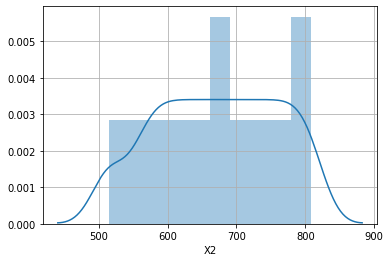

In [27]:
plt.grid()
sns.distplot(df['X2'])

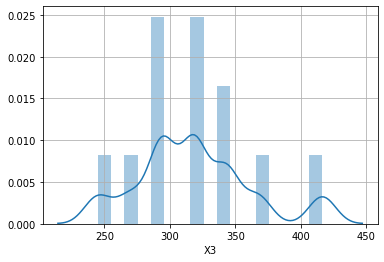

In [28]:
plt.grid()
sns.distplot(df['X3'])

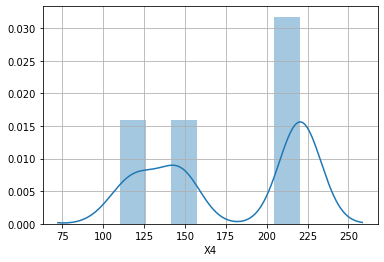

In [29]:
plt.grid()
sns.distplot(df['X4'])

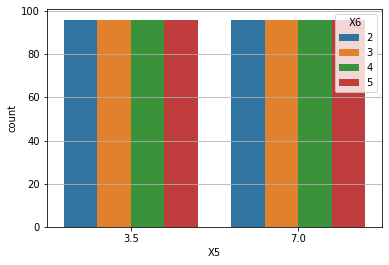

In [36]:
plt.grid()
sns.countplot(df['X5'],hue=df['X6'])

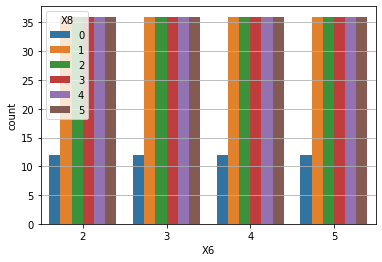

In [37]:
plt.grid()
sns.countplot(df['X6'],hue=df['X8'])

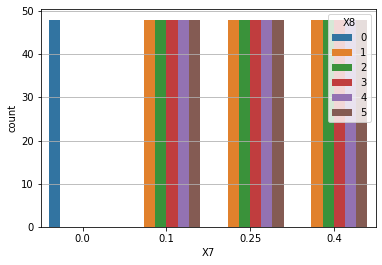

In [39]:
plt.grid()
sns.countplot(df['X7'],hue=df['X8'])

In [40]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


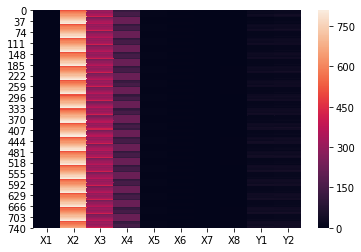

In [41]:
sns.heatmap(df)

In [42]:
corrMatrix = df.corr()
print (corrMatrix)

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

          X6            X7            X8        Y1        Y2  
X1  0.000000  1.283986e-17  1.764620e-17  0.622272  0.634339  
X2  0.000000  1.318356e-16 -3.558613e

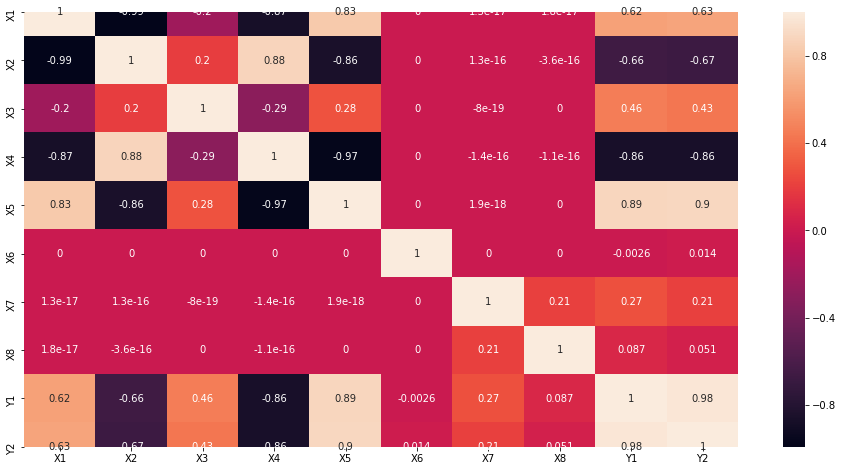

In [47]:
plt.figure(figsize=(16,8)) 
sns.heatmap(corrMatrix, annot=True)

In [48]:
x=df.drop(['Y1','Y2'],axis=1)
y1=df.Y1
y2=df.Y2

In [49]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y1,test_size=0.25)
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.25)

# Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr2=LinearRegression()


In [56]:
lr1.fit(train_x,train_y)
lr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
pred_y1=lr1.predict(test_x)
pred_y2=lr2.predict(x_test)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,pred_y1)


8.349632508944135

In [58]:
mean_squared_error(y_test,pred_y2)

11.607693793385943

In [60]:
print(lr1.intercept_)
print(lr1.coef_)

79.67558429011105
[-6.10762970e+01 -6.06849605e-02  3.79123205e-02 -4.92986405e-02
  4.03003377e+00 -1.23324350e-03  2.03154788e+01  2.36109004e-01]


In [61]:

print(lr2.intercept_)
print(lr2.coef_)

86.75791079764379
[-6.58533200e+01 -5.84022012e-02  2.05901867e-02 -3.94961939e-02
  4.51723786e+00  1.76965681e-01  1.46345301e+01  6.12726236e-02]


In [62]:
from mpl_toolkits import mplot3d

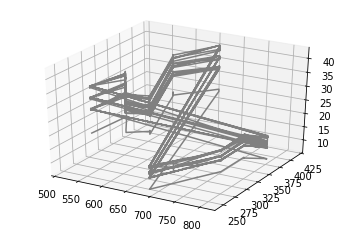

In [190]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df.X2, df.X3, df.Y1, 'gray')


# Random Forest Model

In [173]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(n_estimators = 500, random_state = 42,min_samples_leaf=4,min_weight_fraction_leaf=0.0)
rf2=RandomForestRegressor(n_estimators = 150,criterion='mse', random_state = 42,min_samples_leaf=2,min_weight_fraction_leaf=0.0,max_leaf_nodes=None)
rf1.fit(train_x,train_y)
rf2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [174]:
pred_y1_rf=rf1.predict(test_x)
pred_y2_rf=rf2.predict(x_test)

In [175]:
mse1=mean_squared_error(test_y,pred_y1_rf)
mse2=mean_squared_error(y_test,pred_y2_rf)
mse1,mse2

(0.29930616242943864, 3.2820704080473866)

In [176]:
print(rf1.feature_importances_)

[1.69646760e-01 2.08950781e-01 3.32909478e-02 3.33780720e-01
 1.59484024e-01 2.32889855e-04 7.90591915e-02 1.55546848e-02]


In [177]:
print(rf2.feature_importances_)

[0.33886791 0.12268802 0.03798564 0.10178979 0.33262193 0.00679102
 0.04776654 0.01148916]


In [179]:
rf1.predict(test_x[0:2]),rf2.predict(x_test[0:2])

(array([15.12389051, 11.20146733]), array([15.49582048, 30.05799548]))

In [182]:
test_y[0:2],y_test[0:2]

(708    15.34
 224    11.18
 Name: Y1, dtype: float64, 417    14.38
 636    32.43
 Name: Y2, dtype: float64)

In [186]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y,pred_y1_rf),mean_absolute_error(y_test,pred_y2_rf)

(0.3547306189967807, 1.2015385345518668)

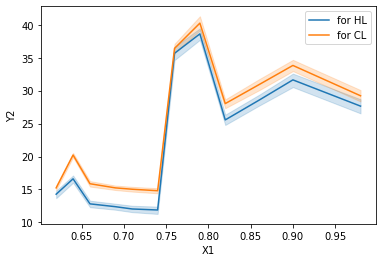

In [187]:
sns.lineplot(df.X1,df.Y1,label='for HL')
sns.lineplot(df.X1,df.Y2,label='for CL')